In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
import os
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
image_size = (128, 128)
batch = 32

train = keras.preprocessing.image_dataset_from_directory(
    './data/',
    validation_split=.1,
    subset='training',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

class_names = train.class_names

Found 1203 files belonging to 6 classes.
Using 1083 files for training.


In [3]:
validation = keras.preprocessing.image_dataset_from_directory(
    './data/',
    validation_split=.1,
    subset='validation',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 1203 files belonging to 6 classes.
Using 120 files for validation.


In [4]:
def display_samples(dataset, n_samples, classes_name):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(n_samples):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(classes_name[np.argmax(labels[i])])
            plt.axis("off")

(128, 128, 3)


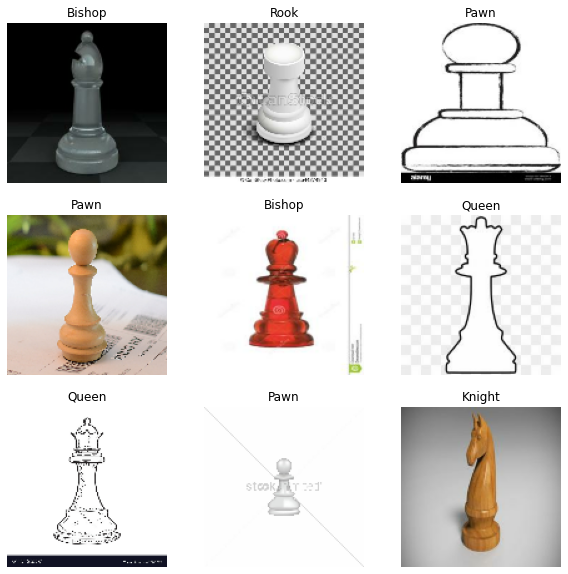

In [5]:
display_samples(train, 9, train.class_names)
for images, labels in train.take(1):
        for i in range(1):
            print(images[i].shape)

In [6]:
# 각각의 데이터가 들어간 경로 설정
dirname = './data/'
dir_chess_folder = os.listdir(dirname)
dir_chess_paths = [os.path.join(dirname, path) for path in dir_chess_folder]

In [7]:
# 각각의 이미지가 얼마나 있나 확인
chess_dic = {}
for path in dir_chess_paths :
    head, tail = os.path.split(path)
    chess_dic[tail] = len(os.listdir(path))

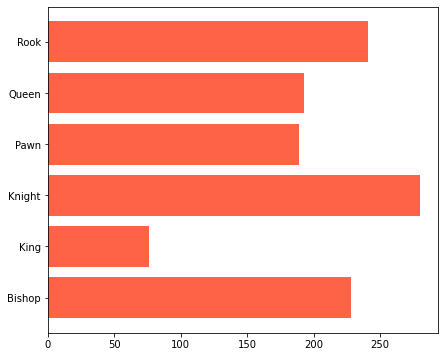

In [8]:
plt.figure(figsize=(7,6))
plt.barh(range(len(chess_dic)), list(chess_dic.values()), color = 'tomato')
plt.yticks(range(len(chess_dic)), list(chess_dic.keys()))
plt.show()

In [9]:
def modelCheck(num_epochs = 40, num_l2 = 0.005):
    input_shape = (image_size[0], image_size[1], 3)
    reg = keras.regularizers.l2(num_l2)

    model = keras.Sequential()
    model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=image_size + (3,), kernel_regularizer=reg))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization(axis=3))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(len(train.class_names), activation='softmax'))

    model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
    )

    epochs = num_epochs

    early_stopping = EarlyStopping()
    EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 0, mode = 'auto')
    
    model.fit(
    train,
    epochs=epochs,
    validation_data=validation,
    callbacks = [early_stopping]
    )

    plot_model(model, show_shapes=True)

    y_pred = np.argmax(model.predict(validation), axis=-1)

    predictions = np.array([])
    labels =  np.array([])
    for x, y in validation:
        predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=-1)])
        labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

    conf = tf.math.confusion_matrix(labels=labels, predictions=predictions)
    sns.heatmap(conf, annot=True, cmap='Blues', yticklabels=class_names, xticklabels=class_names)

    epochs_range = [i+1 for i in range(epochs)]
    plt.plot(epochs_range, model.history.history['accuracy'], '-o', label='Train')
    plt.plot(epochs_range, model.history.history['val_accuracy'], '-x',label='Validation')

    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')

    plt.legend()

Epoch 1/40
34/34 [==============================] - 11s 289ms/step - loss: 2.9508 - accuracy: 0.2198 - val_loss: 4.7415 - val_accuracy: 0.2083
Epoch 2/40
1/1 [==============================] - 0s 148ms/step


KeyError: 'accuracy'

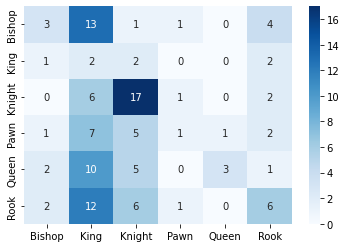

In [10]:
modelCheck()

---  
---

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=90,
    width_shift_range=0.6,
    height_shift_range=0.6,
    shear_range=3, 
    zoom_range=50,
    horizontal_flip=True,
    vertical_flip=True)

In [ ]:
train_datagen